In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [6]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [23]:
# seeing corrolation between Outcome and Other variables
corr = df.corrwith(df['Outcome']).abs().sort_values(ascending=False)
df.drop(corr[corr<0.1].index, axis = 1, inplace = True)

### Machine Learning

In [24]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [25]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
# Splitting data into Train and Test Parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [45]:
y_predict = knn.predict(X_test)

### Evaluation

In [46]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.4583333333333333

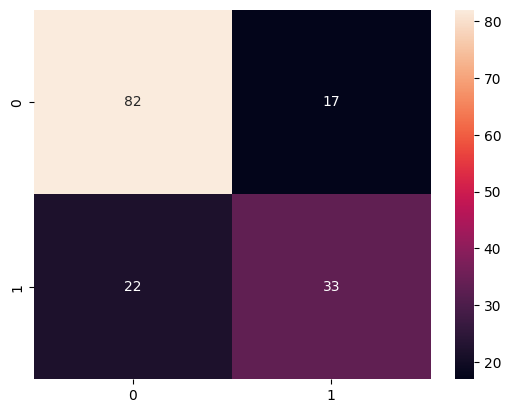

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        99
           1       0.66      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



### Cross Validation

In [49]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(knn, X, y, cv=10)
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



### Finding best K score

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1,25)}
grid = GridSearchCV(knn, param_grid, cv = 5)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25)})

In [40]:
grid.cv_results_['rank_test_score']

array([24, 23, 20, 22, 21, 18, 16, 19, 16, 15, 12, 13, 11, 13, 10,  9,  8,
        7,  4,  5,  1,  3,  2,  6], dtype=int32)

In [41]:
grid.best_params_

{'n_neighbors': 21}

In [42]:
grid.best_score_

0.7774467362702657

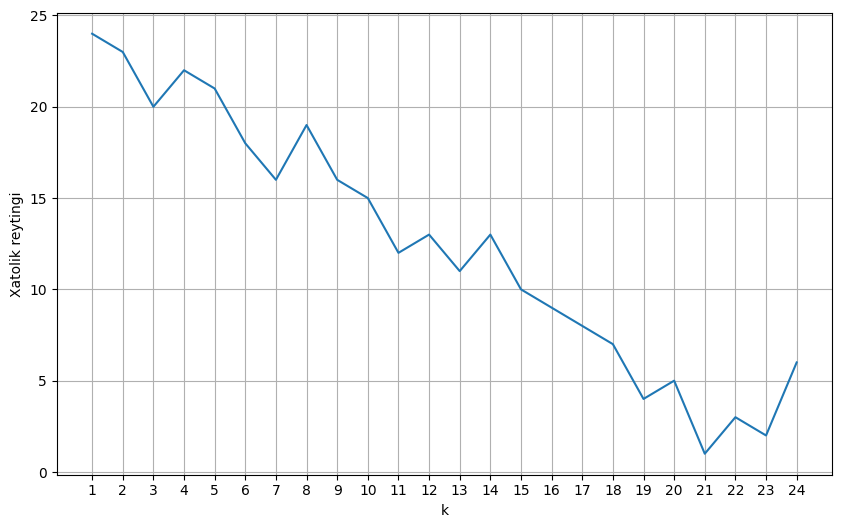

In [43]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], grid.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()
